In [1]:
import numpy as np
import seaborn as sns
sns.set()

# 2. 要約統計量の算出

In [2]:
planet_df = sns.load_dataset("planets")

In [3]:
display(planet_df)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [4]:
planet_df["method"].value_counts()

method
Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: count, dtype: int64

In [5]:
planet_df.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [6]:
# 比例尺度に絞る
desc = planet_df.describe().drop(columns="year").T

In [7]:
# 変動係数を確認
desc["std"] / desc["mean"]

number             0.695027
orbital_period    12.988417
mass               1.447454
distance           2.776228
dtype: float64

# 3. 可視化

## ヒストグラム

<Axes: xlabel='count', ylabel='method'>

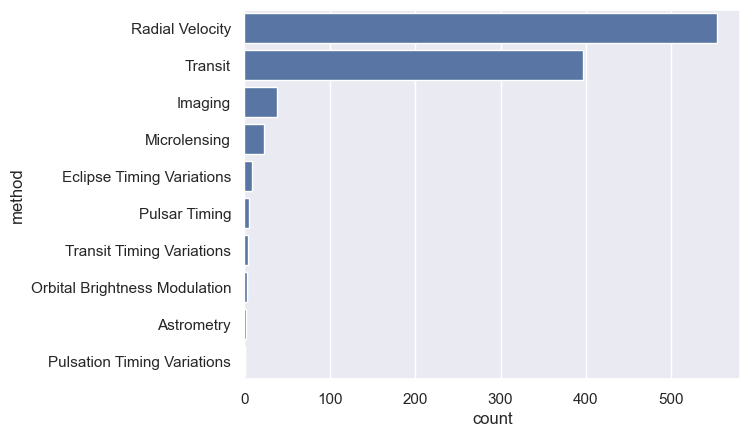

In [8]:
sns.countplot(data=planet_df, y="method",
              order=planet_df["method"].value_counts().index)


<Axes: xlabel='mass', ylabel='Count'>

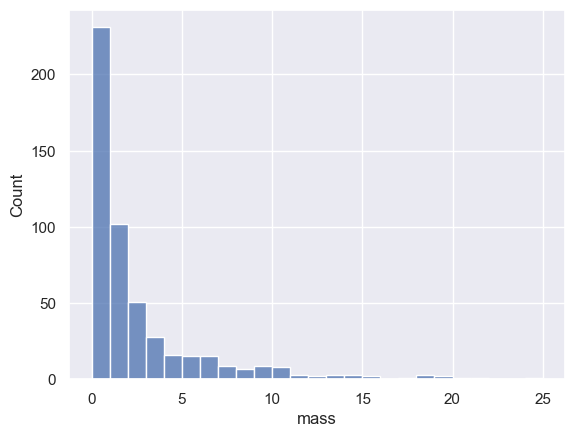

In [9]:
sns.histplot(data=planet_df, x="mass", binwidth=1)

<Axes: xlabel='mass', ylabel='Count'>

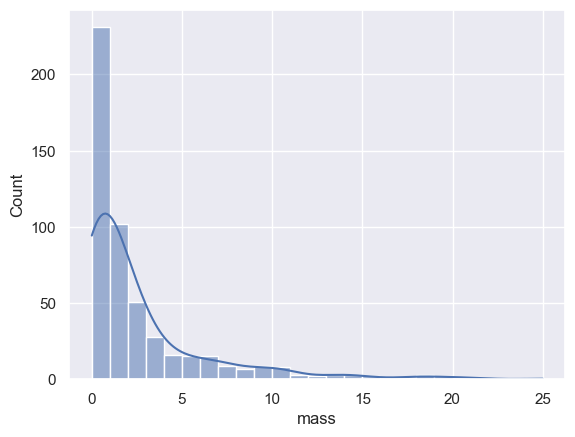

In [10]:
sns.histplot(data=planet_df, x="mass", binwidth=1, kde=True)

<Axes: xlabel='mass', ylabel='Count'>

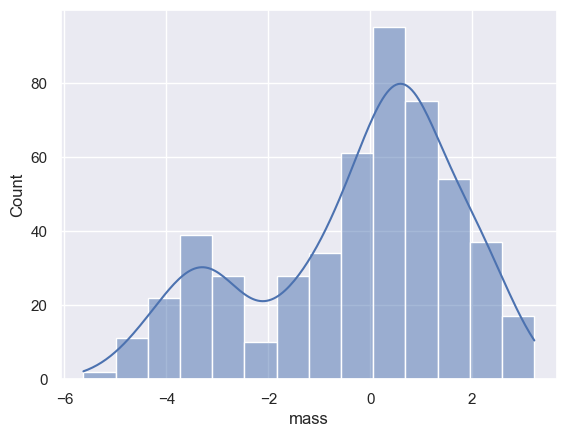

In [11]:
planet_df["mass"] = np.log(planet_df["mass"])
sns.histplot(data=planet_df, x="mass", kde=True)

## 散布図

<Axes: xlabel='sepal_length', ylabel='petal_length'>

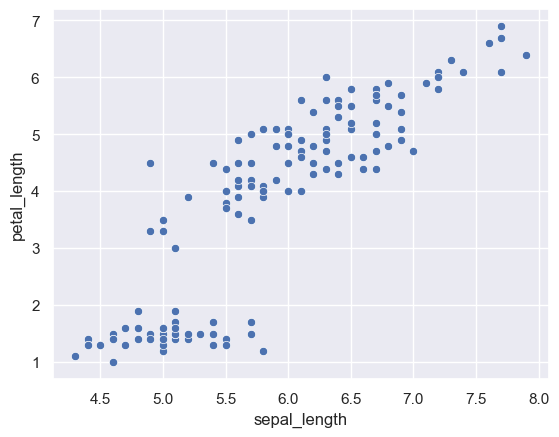

In [12]:
iris_df = sns.load_dataset("iris")
sns.scatterplot(data=iris_df, x="sepal_length", y="petal_length")

In [13]:
iris_df.groupby("species")[["sepal_length", "petal_length"]].apply(
    lambda x: x["sepal_length"].corr(x["petal_length"])
)

species
setosa        0.267176
versicolor    0.754049
virginica     0.864225
dtype: float64

<Axes: xlabel='sepal_length', ylabel='petal_length'>

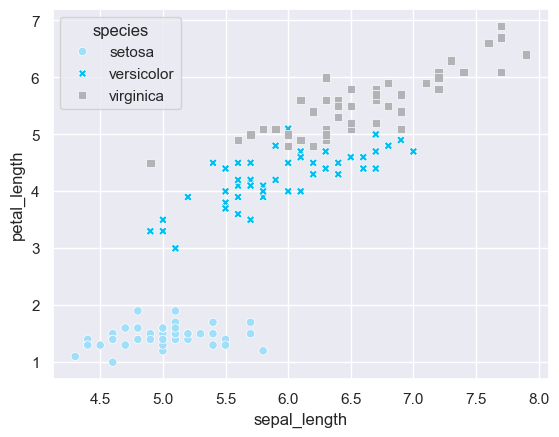

In [14]:
sns.scatterplot(
    data=iris_df, x="sepal_length", y="petal_length",
    hue="species", style="species",
    palette=['#a1def9', '#00bdf2', '#b2b3b6'],
    markers={"setosa": "o", "versicolor": "X", "virginica": "s"}
)

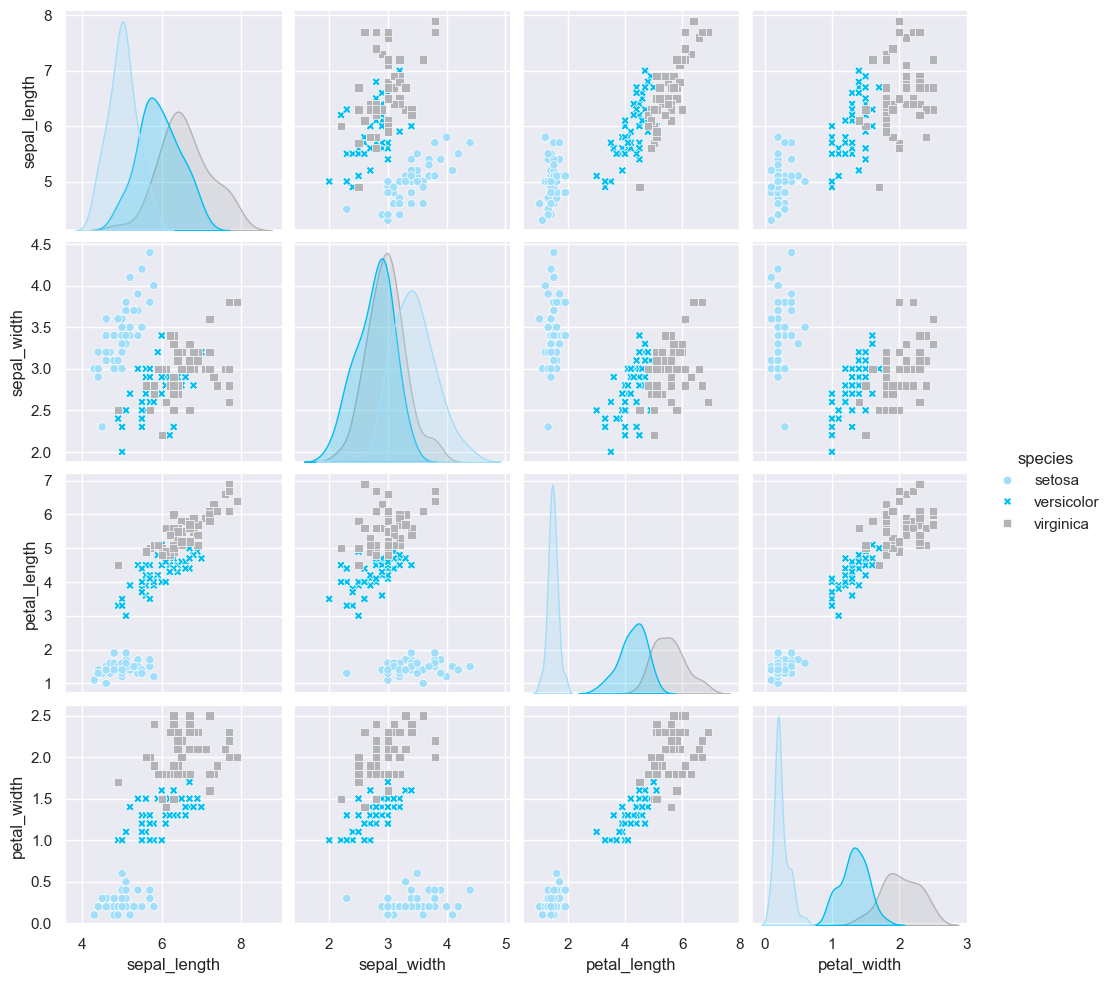

In [15]:
sns.pairplot(
    iris_df,
    hue="species",
    palette=['#a1def9', '#00bdf2', '#b2b3b6'],
    markers={"setosa": "o", "versicolor": "X", "virginica": "s"}
)

## 箱ひげ図

<Axes: xlabel='sepal_length', ylabel='species'>

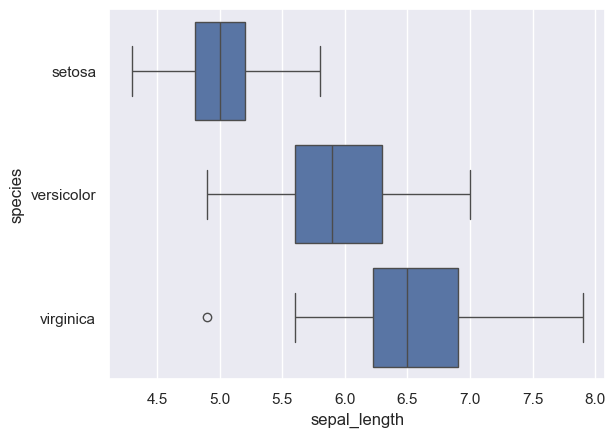

In [16]:
sns.boxplot(data=iris_df, x="sepal_length", y="species")

## バイオリンプロット

<Axes: xlabel='sepal_length', ylabel='species'>

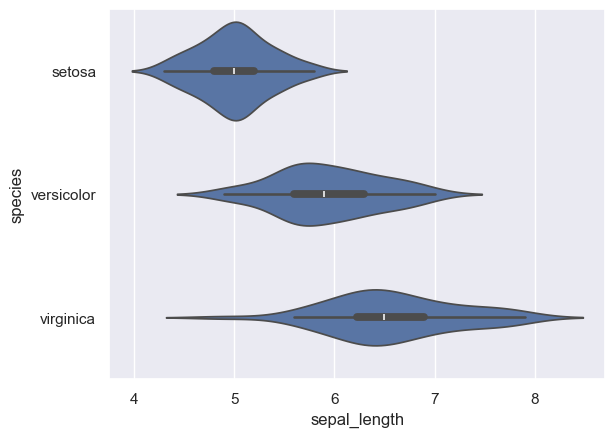

In [17]:
sns.violinplot(data=iris_df, x="sepal_length", y="species")